# Множественная регрессия

### 1. Импорт библиотек

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.tsaplots import plot_acf

### 2. Загрузка датасета 
Будет использоваться готовый датасет из библиотеки sklearn, содержащий цены на недвижимость в Бостоне.

In [238]:
boston = load_boston()
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df['target'] = boston.target

print("Пропущенные значения:\n", df.isnull().sum().sort_values(ascending=False))
print("\nТипы значений:\n",df.dtypes)
df.head()

Пропущенные значения:
 target     0
LSTAT      0
B          0
PTRATIO    0
TAX        0
RAD        0
DIS        0
AGE        0
RM         0
NOX        0
CHAS       0
INDUS      0
ZN         0
CRIM       0
dtype: int64

Типы значений:
 CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 3. Отделение регрессоров и целевой переменной, разделение выборки на обучающую и тестовую, запуск линейной регрессии и вывод графиков остатков и подбора 

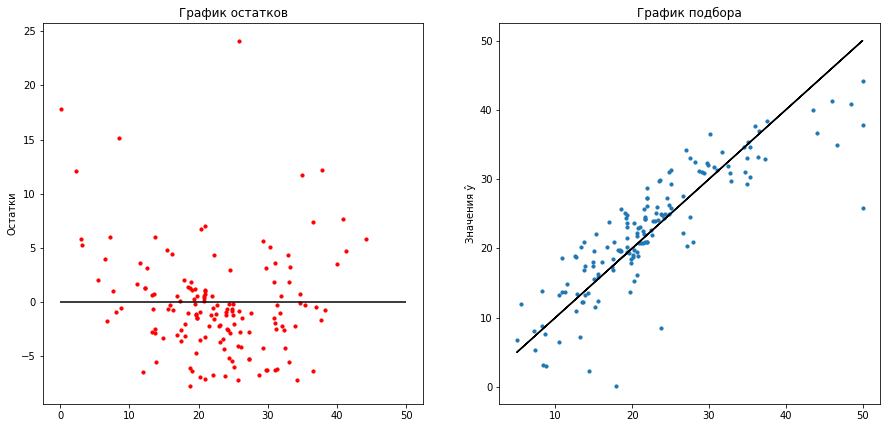

Оценка R^2 модели:
 0.7328112435633848


In [245]:
X = df.drop(columns = 'target')
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 2)

lm = LinearRegression()
lm.fit(X_train, y_train)

f = plt.figure()
f.set_figheight(7)
f.set_figwidth(15)
plt.subplot(121)
plt.title("График остатков")
plt.ylabel('Остатки')
plt.scatter(predict, y_test - predict, s = 10, color = 'red')
plt.hlines(y = 0, xmin = 0, xmax = 50)

plt.subplot(122)
plt.title("График подбора")
plt.ylabel('Значения ŷ')
plt.scatter(y_test, predict, s = 10)
plt.plot(y_test, y_test, color = 'black')
plt.show()

print('Оценка R^2 модели:\n', r2_score(y_test, predict))

### 4. Анализ на гетероскедастичность с помощью теста Бройша - Пагана и оценка мультиколлинеарности с помощью корреляционной матрицы 

P-значение теста Бройша-Пагана:
 0.0023426867277864757


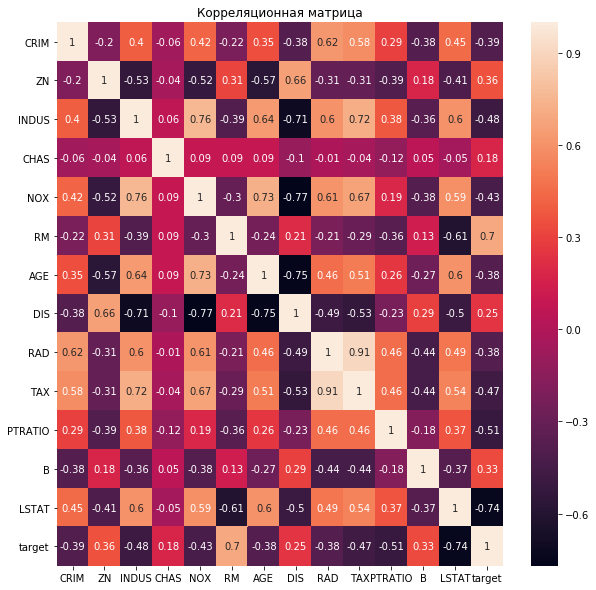

In [240]:
p_val = het_breuschpagan(resid = (y_test - predict), exog_het = X_test)[1]
print("P-значение теста Бройша-Пагана:\n", p_val)


corr = df.corr().round(2)
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True)
plt.title('Корреляционная матрица')
plt.show()

Низкое p-значение теста позволяет отвергнуть гипотезу о том, что данные гомоскедастичны.

Наличие нескольких регрессоров с высокой корреляцией между собой показывает присутствие мультиколлинеарности в данных.

### 5. Вывод графика автокорреляции

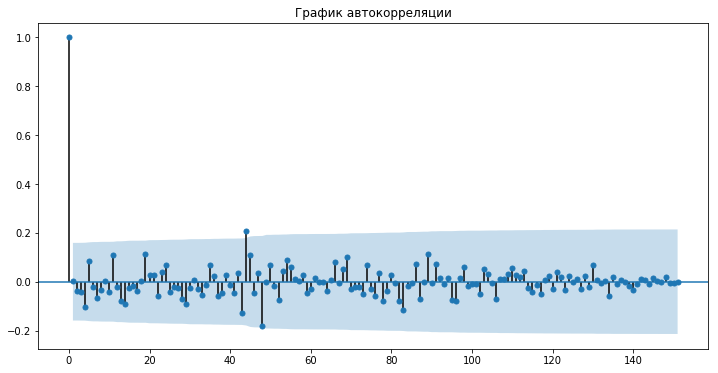

In [243]:
fig, ax = plt.subplots(figsize=(12,6))
plot_acf((y_test - predict), ax = ax)
plt.title('График автокорреляции')
plt.show()

Значения автокорреляции лежат в пределах доверительного интервала, что означает отсутствие автокорреляции в данных.